In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import time
from matplotlib import cm
from collections import OrderedDict

In [2]:
#physical susceptibility
def inv_physical_susc(U, JUratio, qnt):
    J = JUratio*U
    U1 = U-2*J
    J1 = J
    o=5
    inter=np.zeros((o**2,o**2), dtype=float)
    lis = []
    for i in range(o**2):
        inter[i,i] = U1
    for i in range(o):
        param = o*i+i
        lis.append(param)
        inter[param,param]=U
    for k in lis:
        for m in lis:
            if m !=k:
                inter[k,m] = J
    for k in range(o):
        for m in range(o):
            A = o*k+m
            B = o*m+k
            if m !=k:
                inter[A,B] = J1
    inter5=inter
    
    Co = np.zeros((80,80))
    Co[0:5,0:5] = inter5[0:5,0:5]
    Co[16:21,16:21] = inter5[5:10,5:10]
    Co[32:37,32:37] = inter5[10:15,10:15]
    Co[48:53,48:53] = inter5[15:20,15:20]
    Co[64:69,64:69] = inter5[20:25,20:25]
    Co[0:5,16:21] = inter5[0:5,5:10]
    Co[0:5,32:37] = inter5[0:5,10:15]
    Co[0:5,48:53] = inter5[0:5,15:20]
    Co[0:5,64:69] = inter5[0:5,20:25]
    Co[16:21,0:5] = inter5[5:10,0:5]
    Co[16:21,32:37] = inter5[5:10,10:15]
    Co[16:21,48:53] = inter5[5:10,15:20]
    Co[16:21,64:69] = inter5[5:10,20:25]
    Co[32:37,0:5] = inter5[10:15,0:5]
    Co[32:37,16:21] = inter5[10:15,5:10]
    Co[32:37,48:53] = inter5[10:15,15:20]
    Co[32:37,64:69] = inter5[10:15,20:25]
    Co[48:53,0:5] = inter5[15:20,0:5]
    Co[48:53,16:21] = inter5[15:20,5:10]
    Co[48:53,32:37] = inter5[15:20,10:15]
    Co[48:53,64:69] = inter5[15:20,20:25]
    Co[64:69,0:5] = inter5[20:25,0:5]
    Co[64:69,16:21] = inter5[20:25,5:10]
    Co[64:69,32:37] = inter5[20:25,10:15]
    Co[64:69,48:53] = inter5[20:25,15:20]
    
    As = np.zeros((48,48))

    INT_inter = np.zeros((269,269))
    INT=np.zeros((256,256))
    INT_inter[0:80,0:80] = Co
    INT_inter[85:165,85:165] = Co
    INT_inter[170:218,170:218] = As
    INT_inter[221:269,221:269] = As
    INT = INT_inter[0:256,0:256]

    o=16
    susc_resh=np.reshape(np.transpose(suscall[qnt]), (o**2,o**2))
    inver = np.dot(np.linalg.inv(np.identity(o**2) - np.dot((susc_resh), INT)), susc_resh)
    
    #physical
    lis = []
    for i in range(o):
        lis.append(o*i+i)
    susc_phys_component = []
    for i in lis:
        for k in lis:
            susc_phys_component.append(inver[k][i])
    susc_phys=0.5*np.real(np.sum(susc_phys_component))
    return susc_phys

#     eigenValues = la.eigh(inver)[0] #selecting eigenvalues only
#     eigenValues = np.real(eigenValues)
#     inveigenValues = 1/eigenValues
#     idx = inveigenValues.argsort() #sorting eigenvalues
#     inveigenValues = inveigenValues[idx]
#     return 1/abs(inveigenValues[0])

In [3]:
def smallfunc(U, JUratio):
    phys = []
    for qnt in range(51):
        susc_p = inv_physical_susc(U,JUratio,qnt)
        phys.append(susc_p)
    return phys

In [ ]:
#physical
susc_phys_all = []
q_tot = 21
orb=16
N=25
kz = 0

fil=12.78
UoverUc = 0.995
U = 2.94017731*UoverUc #12.78
JUratio = 0.25

# fil=12.78
# UoverUc = 0.995
# U = 3.158537376*UoverUc #12.78
# JUratio = 0.

# fil=13.00
# UoverUc = 0.995
# U=1.745195776*UoverUc #13.00
# JUratio = 0.25

my_path = 'C:/Users/amnedic/Desktop/AllHams/2dcuts_including_finite_frequencies/'+str(fil)+'/z='+str(kz)+'/'
for c in range(q_tot):
    cut = str(c)
    susc0 = np.loadtxt(my_path+'2D_GXnumba_N='+str(N)+'_fil='+str(fil)+'_z='+str(kz)+'_y='+str(cut)+'_q=0.dat', dtype=complex)
    susc1 = np.loadtxt(my_path+'2D_GXnumba_N='+str(N)+'_fil='+str(fil)+'_z='+str(kz)+'_y='+str(cut)+'_q=1.dat', dtype=complex)
    susc2 = np.loadtxt(my_path+'2D_GXnumba_N='+str(N)+'_fil='+str(fil)+'_z='+str(kz)+'_y='+str(cut)+'_q=2.dat', dtype=complex)
    susc3 = np.loadtxt(my_path+'2D_GXnumba_N='+str(N)+'_fil='+str(fil)+'_z='+str(kz)+'_y='+str(cut)+'_q=3.dat', dtype=complex)
    susc4 = np.loadtxt(my_path+'2D_GXnumba_N='+str(N)+'_fil='+str(fil)+'_z='+str(kz)+'_y='+str(cut)+'_q=4.dat', dtype=complex)
    susc5 = np.loadtxt(my_path+'2D_GXnumba_N='+str(N)+'_fil='+str(fil)+'_z='+str(kz)+'_y='+str(cut)+'_q=5.dat', dtype=complex)
    susc6 = np.loadtxt(my_path+'2D_GXnumba_N='+str(N)+'_fil='+str(fil)+'_z='+str(kz)+'_y='+str(cut)+'_q=6.dat', dtype=complex)
    susc7 = np.loadtxt(my_path+'2D_GXnumba_N='+str(N)+'_fil='+str(fil)+'_z='+str(kz)+'_y='+str(cut)+'_q=7.dat', dtype=complex)
    susc8 = np.loadtxt(my_path+'2D_GXnumba_N='+str(N)+'_fil='+str(fil)+'_z='+str(kz)+'_y='+str(cut)+'_q=8.dat', dtype=complex)
    susc9 = np.loadtxt(my_path+'2D_GXnumba_N='+str(N)+'_fil='+str(fil)+'_z='+str(kz)+'_y='+str(cut)+'_q=9.dat', dtype=complex)
    susc10 = np.loadtxt(my_path+'2D_GXnumba_N='+str(N)+'_fil='+str(fil)+'_z='+str(kz)+'_y='+str(cut)+'_q=10.dat', dtype=complex)
    susc11 = np.loadtxt(my_path+'2D_GXnumba_N='+str(N)+'_fil='+str(fil)+'_z='+str(kz)+'_y='+str(cut)+'_q=11.dat', dtype=complex)
    susc12 = np.loadtxt(my_path+'2D_GXnumba_N='+str(N)+'_fil='+str(fil)+'_z='+str(kz)+'_y='+str(cut)+'_q=12.dat', dtype=complex)
    susc13 = np.loadtxt(my_path+'2D_GXnumba_N='+str(N)+'_fil='+str(fil)+'_z='+str(kz)+'_y='+str(cut)+'_q=13.dat', dtype=complex)
    susc14 = np.loadtxt(my_path+'2D_GXnumba_N='+str(N)+'_fil='+str(fil)+'_z='+str(kz)+'_y='+str(cut)+'_q=14.dat', dtype=complex)
    susc15 = np.loadtxt(my_path+'2D_GXnumba_N='+str(N)+'_fil='+str(fil)+'_z='+str(kz)+'_y='+str(cut)+'_q=15.dat', dtype=complex)
    susc16 = np.loadtxt(my_path+'2D_GXnumba_N='+str(N)+'_fil='+str(fil)+'_z='+str(kz)+'_y='+str(cut)+'_q=16.dat', dtype=complex)
    susc17 = np.loadtxt(my_path+'2D_GXnumba_N='+str(N)+'_fil='+str(fil)+'_z='+str(kz)+'_y='+str(cut)+'_q=17.dat', dtype=complex)
    susc18 = np.loadtxt(my_path+'2D_GXnumba_N='+str(N)+'_fil='+str(fil)+'_z='+str(kz)+'_y='+str(cut)+'_q=18.dat', dtype=complex)
    susc19 = np.loadtxt(my_path+'2D_GXnumba_N='+str(N)+'_fil='+str(fil)+'_z='+str(kz)+'_y='+str(cut)+'_q=19.dat', dtype=complex)
    susc20 = np.loadtxt(my_path+'2D_GXnumba_N='+str(N)+'_fil='+str(fil)+'_z='+str(kz)+'_y='+str(cut)+'_q=20.dat', dtype=complex)

    suscall = np.array([susc0,susc1,susc2,susc3,susc4,susc5,susc6,susc7,susc8,susc9,susc10,susc11,susc12,susc13,susc14,susc15,susc16,susc17,susc18,susc19,susc20])    
    phys = []
    for qnt in range(q_tot):
        susc_p = inv_physical_susc(U,JUratio,qnt)
        phys.append(susc_p)
    susc_phys_all.append(phys)
    print('cut = ', cut, ', progres:', round(len(susc_phys_all)/20*100, 3), '%')

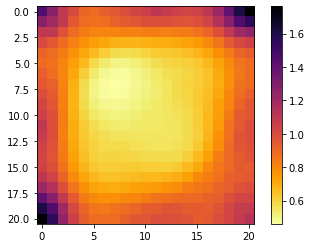

In [82]:
N=21
fig, ax = plt.subplots()
c=ax.imshow(np.log10(np.real(susc_phys_all)), interpolation=None, cmap=plt.get_cmap('inferno_r'))
fig.colorbar(c)
plt.show()

In [83]:
print(np.shape(susc_phys_all))

(21, 21)


4.058789096655754 1.7627097078866778


<Figure size 432x288 with 0 Axes>

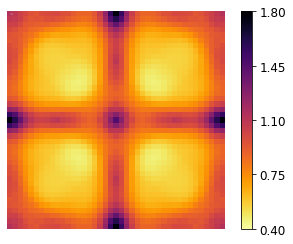

kz= 0 J/U= 0.25 U= 2.92547642345


In [91]:
#full BZ inlcuding the edges

susc_phys_all = np.real(susc_phys_all)
newlistfull = []
for k in range(41):
    sublist = []
    if k<21:
        for m in range(41):
            if m<21:
                sublist.append(susc_phys_all[20-k][20-m])
            else:
                sublist.append(susc_phys_all[20-k][m-20])
    else:
        for m in range(41):
            if m<21:
                sublist.append(susc_phys_all[k-20][20-m])
            else:
                sublist.append(susc_phys_all[k-20][m-20])
    newlistfull.append(sublist)

newlistfull = np.array(newlistfull, dtype=float)

bz = plt.figure()
bz, ax = plt.subplots()
c=ax.imshow(np.log10(np.real(newlistfull)), interpolation=None, cmap=plt.get_cmap('inferno_r'))
plt.axis('off')
plt.gca().xaxis.tick_bottom()
plt.hlines(y=0., xmin=0.0, xmax=0.5, color='w', linestyle='dashed', alpha=0.2)

minval = np.amin(np.log10(np.real(newlistfull)))
maxval = np.amax(np.log10(np.real(newlistfull)))
print(np.amax(np.log(np.real(newlistfull))), maxval)
minval = 0.4
maxval = 1.8
t_list2 = minval + np.linspace(0., 1., num=5)*(maxval-minval)

cbar = fig.colorbar(c, ax=ax, ticks=t_list2, orientation="vertical")
cbar.ax.set_yticklabels(t_list2)
cbar.ax.tick_params(labelsize=12)
c.set_clim(minval, maxval)

plt.show()
print('kz=', kz, 'J/U=', JUratio, 'U=', U)


In [ ]:
#ln
#full BZ inlcuding the edges

bz = plt.figure()
bz, ax = plt.subplots()
c=ax.imshow(np.log(np.real(newlistfull)), interpolation=None, cmap=plt.get_cmap('inferno_r'))
plt.axis('off')
plt.gca().xaxis.tick_bottom()
plt.hlines(y=0., xmin=0.0, xmax=0.5, color='w', linestyle='dashed', alpha=0.2)
minval = np.amin(np.log(np.real(newlistfull)))
maxval = np.amax(np.log(np.real(newlistfull)))
print(np.amax(np.log(np.real(newlistfull))), maxval)
minval=0.0425*10/np.pi
minval=0.14
maxval=0*10/np.pi
t_list2 = minval + np.linspace(0., 1., num=5)*(maxval-minval)
print(t_list2)
cbar = fig.colorbar(c, ax=ax, ticks=t_list2, orientation="vertical")
cbar.ax.set_yticklabels(t_list2)
cbar.ax.tick_params(labelsize=12)
c.set_clim(minval, maxval)

plt.show()
print('kz=', kz, 'J/U=', JUratio, 'U=', U)

In [179]:
#bz.savefig('2Dcut_fil='+str(fil)+'_z='+str(kz)+'_'+str(UoverUc)+'Uc_JUratio='+str(JUratio)+'.pdf', bbox_inches='tight', dpi=2000)